In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
source = pd.read_csv("../data/source.csv", parse_dates=["start", "end"])

In [101]:
# wr = pd.read_csv("../data/weather/weather_report_2709555247418929082.csv", parse_dates=["Date"])
# wr = pd.read_csv("../data/weather/weather_report_1620322523.634392.csv", parse_dates=["Date"])
wr = pd.read_csv("../data/weather/weather_report_1620408982.771627.csv", parse_dates=["Date"])
wr = wr[~wr.duplicated()]

In [102]:
wr["Hour"] = pd.Timedelta('1h') * wr["Hour"]/100

In [103]:
wr["Time"] = wr["Date"] + wr["Hour"]

In [20]:
# wr.columns = wr.columns.str.lower()
# wr.columns = wr.columns.str.replace("%", "perc")
# wr.columns = wr.columns.str.replace("°", "degrees")
# wr.columns = wr.columns.str.replace(" ", "")
# wr.columns

#wr.columns[wr.columns.str.contains("Hly")].str.replace("Hly", "")

Text(0, 0.5, 'Humidity')

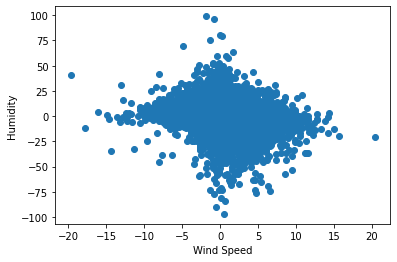

In [96]:
ax = plt.axes()
plt.scatter(wr["HlyWindSpd (MPH)"].diff().values, wr["HlyRelHum (%)"].diff().values)
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Humidity")

In [134]:
wr[target_columns].apply(np.log).corr().loc["HlyWindSpd (MPH)"]

HlyAirTmp (F)         0.288108
HlyDewPnt (F)        -0.081907
HlyEto (in)           0.266073
HlyNetRad (Ly/day)    0.137092
HlyAsceEto (in)       0.251585
HlyAsceEtr (in)       0.424898
HlyPrecip (in)        0.144005
HlyRelHum (%)        -0.286766
HlyResWind (MPH)      0.897546
HlySoilTmp (F)       -0.067210
HlySolRad (Ly/day)    0.264013
HlyVapPres (mBars)   -0.074260
HlyWindDir (°)        0.054940
HlyWindSpd (MPH)      1.000000
Name: HlyWindSpd (MPH), dtype: float64

In [75]:
wind_max = wr[["Station", "HlyWindSpd (MPH)"]].groupby("Station").max()
wind_max = wind_max[wind_max > 31].dropna()
wind_max

,HlyWindSpd (MPH)
Station,
121,35.6
140,34.8
212,32.5
248,31.7
261,36.2


In [180]:
wr[(wr.Date >= "2021-01-12") & (wr.Date <= "2021-01-21")].sort_values(["HlyWindSpd (MPH)", "HlyRelHum (%)"], ascending=False)

,Date,Julian,Hour,Station,Standard,ZipCodes,Scope,HlyAirTmp (F),HlyDewPnt (F),HlyEto (in),...,HlyAsceEto (in),HlyAsceEtr (in),HlyPrecip (in),HlyRelHum (%),HlyResWind (MPH),HlySoilTmp (F),HlySolRad (Ly/day),HlyVapPres (mBars),HlyWindDir (°),HlyWindSpd (MPH)
Time,,,,,,,,,,,,,,,,,,,,,
2021-01-12 23:00:00,2021-01-12,12,0 days 23:00:00,261,english,"96034, 96038, 96064, 96094",hourly,47.5,40.3,0.00,...,0.00,NaN,0.0,76.0,31.4,40.6,0.0,8.5,143.0,31.8
2021-01-13 00:00:00,2021-01-12,12,1 days 00:00:00,261,english,"96034, 96038, 96064, 96094",hourly,46.8,40.3,0.00,...,0.00,NaN,0.0,78.0,28.9,40.7,0.0,8.5,132.0,29.6
2021-01-12 19:00:00,2021-01-12,12,0 days 19:00:00,261,english,"96034, 96038, 96064, 96094",hourly,45.6,38.1,0.00,...,0.00,NaN,0.0,75.0,28.9,40.5,0.0,7.8,157.0,29.3
2021-01-12 20:00:00,2021-01-12,12,0 days 20:00:00,261,english,"96034, 96038, 96064, 96094",hourly,47.2,38.7,0.00,...,0.00,NaN,0.0,72.0,28.6,40.5,0.0,8.0,154.0,29.1
2021-01-19 10:00:00,2021-01-19,19,0 days 10:00:00,125,english,93203,hourly,60.7,17.4,0.01,...,0.01,NaN,0.0,18.0,28.0,52.1,108.0,3.3,61.0,29.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-12 18:00:00,2021-01-12,12,0 days 18:00:00,236,english,"96058, 96023",hourly,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-12 19:00:00,2021-01-12,12,0 days 19:00:00,236,english,"96058, 96023",hourly,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-12 20:00:00,2021-01-12,12,0 days 20:00:00,236,english,"96058, 96023",hourly,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
se_dates = source[["start", "end"]]
se_dates = se_dates[~se_dates.duplicated()].sort_values(by="start").reset_index(drop=True)
se_dates.iloc[6:]

,start,end
6,2020-12-04,2020-12-14
7,2020-12-16,2020-12-24
8,2021-01-12,2021-01-21


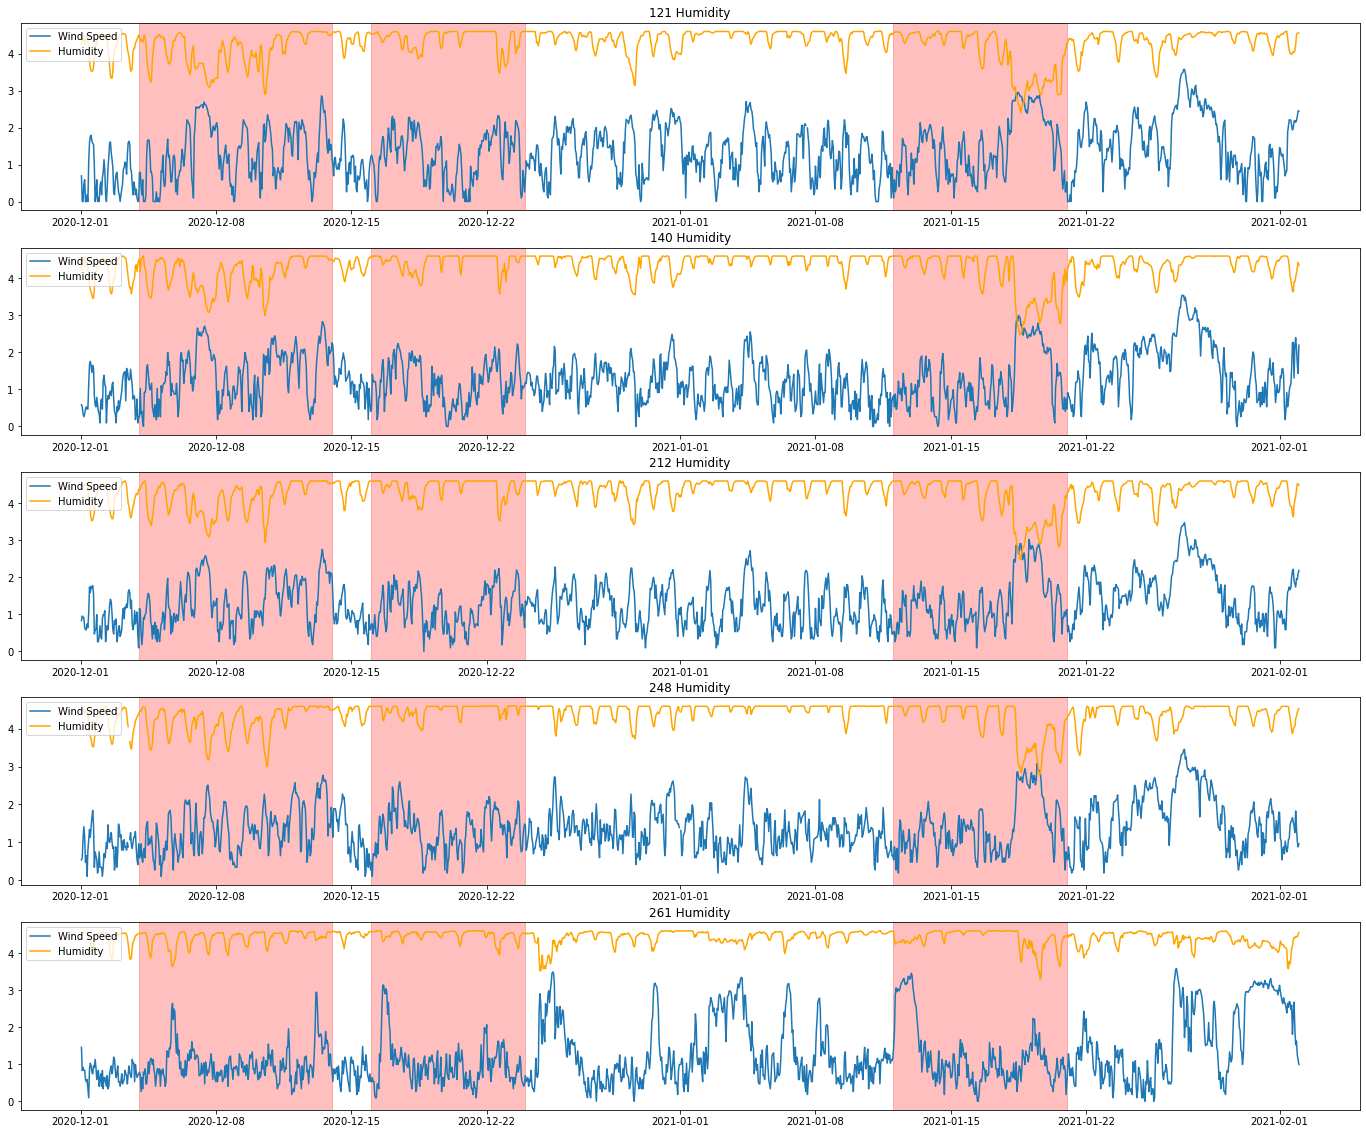

In [138]:
stations = wind_max.index
dates = se_dates.iloc[6:]
fig, ax = plt.subplots(len(stations), 1,figsize=(24,20))
for (s, v_ax) in zip(stations, ax):
        wrs = wr[wr.Station==s]
        
        # For a single date range, narrow plot to that range
        if len(dates.index) == 2:
            wrs = wrs.loc[dates.start:dates.end]
            
        v_ax.plot(np.log(wrs["HlyWindSpd (MPH)"]), label="Wind Speed")
        v_ax.set_title("{} Wind Speed".format(s))
        
        v_ax.plot(np.log(wrs["HlyRelHum (%)"]), color="orange", label="Humidity")
        v_ax.set_title("{} Humidity".format(s))
        
        # For multiple date ranges, highlight relevant time
        if len(dates.index) > 2:
            for (start, end) in dates.values:
                v_ax.axvspan(start, end, color='red', alpha=0.25)

        v_ax.legend(loc="upper left")
#         v_ax[1].hist(wrs["HlyWindSpd (MPH)"].diff(), bins=30)
#         v_ax[1].set_title("{} Wind Speed Increments".format(s))
            
#         v_ax[3].hist(wrs["HlyRelHum (%)"].diff(), bins=30)
#         v_ax[3].set_title("{} Humidity".format(s))


(<AxesSubplot:>,)

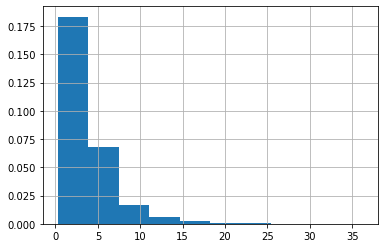

In [53]:
wr["HlyWindSpd (MPH)"].hist(density=True, cumulative=False), 

In [51]:
wr["HlyWindSpd (MPH)"].describe()

count    1968.000000
mean        4.969004
std         4.073195
min         1.000000
25%         2.400000
50%         3.400000
75%         6.100000
max        23.100000
Name: HlyWindSpd (MPH), dtype: float64

In [100]:
wr.columns

Index(['Date', 'Julian', 'Hour', 'Station', 'Standard', 'ZipCodes', 'Scope',
       'HlyAirTmp (F)', 'HlyDewPnt (F)', 'HlyEto (in)', 'HlyNetRad (Ly/day)',
       'HlyAsceEto (in)', 'HlyAsceEtr (in)', 'HlyPrecip (in)', 'HlyRelHum (%)',
       'HlyResWind (MPH)', 'HlySoilTmp (F)', 'HlySolRad (Ly/day)',
       'HlyVapPres (mBars)', 'HlyWindDir (°)', 'HlyWindSpd (MPH)'],
      dtype='object')

## GlutonTS

In [110]:
wr_gts = wr
# wr_gts.set_index("Time", inplace=True)
wr_gts = wr_gts[wr_gts.columns[(wr_gts.columns.str.contains("Hly")) | (wr_gts.columns.str.contains("Station"))]]
wr_gts.tail()

,Station,HlyAirTmp (F),HlyDewPnt (F),HlyEto (in),HlyNetRad (Ly/day),HlyAsceEto (in),HlyAsceEtr (in),HlyPrecip (in),HlyRelHum (%),HlyResWind (MPH),HlySoilTmp (F),HlySolRad (Ly/day),HlyVapPres (mBars),HlyWindDir (°),HlyWindSpd (MPH)
Time,,,,,,,,,,,,,,,
2021-02-01 20:00:00,264,38.9,29.1,0.0,-39.0,0.0,NaN,0.0,67.0,4.2,33.0,0.0,5.4,166.0,6.9
2021-02-01 21:00:00,264,40.3,28.2,0.0,-40.0,0.0,NaN,0.0,62.0,5.2,33.0,0.0,5.2,119.0,6.6
2021-02-01 22:00:00,264,40.7,29.1,0.0,-39.0,0.0,NaN,0.0,63.0,5.3,33.0,0.0,5.4,181.0,7.5
2021-02-01 23:00:00,264,40.1,30.7,0.0,-39.0,0.0,NaN,0.0,69.0,15.2,33.0,0.0,5.8,219.0,15.4
2021-02-02 00:00:00,264,40.5,30.5,0.0,-39.0,0.0,NaN,0.0,67.0,16.8,33.1,0.0,5.7,228.0,16.9


In [143]:
from gluonts.dataset.common import ListDataset

wr_by_station = wr_gts.groupby("Station")
target_columns = wr_gts.columns[wr_gts.columns.str.contains("Hly")]

raw_data = [[{"start": df.index[0], "target": df.loc[:"2021-01-17 00:00:00", c]} for (s, df) in wr_gts.groupby("Station")] for c in target_columns]
training_data = ListDataset(
    sum(raw_data, []),
    freq = "60min")

In [152]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

estimator = DeepAREstimator(freq="60min", prediction_length=24*3, trainer=Trainer(epochs=20))

In [153]:
predictor = estimator.train(training_data=training_data)

  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:08<00:00,  6.20it/s, epoch=20/20, avg_epoch_loss=0.473]


Skipping  0 HlyAirTmp (F)
Skipping  1 HlyDewPnt (F)
Skipping  2 HlyEto (in)
Skipping  3 HlyNetRad (Ly/day)
Skipping  4 HlyAsceEto (in)
Skipping  5 HlyAsceEtr (in)
Skipping  6 HlyPrecip (in)
Skipping  7 HlyRelHum (%)
Skipping  8 HlyResWind (MPH)
Skipping  9 HlySoilTmp (F)
Skipping  10 HlySolRad (Ly/day)
Skipping  11 HlyVapPres (mBars)
Skipping  12 HlyWindDir (°)
Showing  13 HlyWindSpd (MPH)


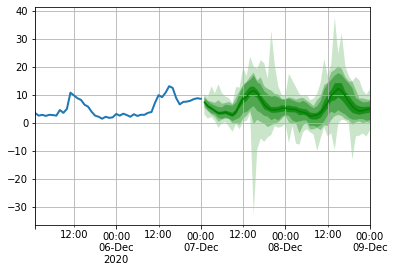

In [61]:
from gluonts.dataset.util import to_pandas
i = 0
for test_entry, forecast in zip(training_data, predictor.predict(training_data)):
    if i == len(wr_gts.columns)-1:
        print("Showing ", i, wr_gts.columns[i])
        to_pandas(test_entry)[-48:].plot(linewidth=2)
        forecast.plot(color='g', prediction_intervals=[50,90,95,99])
    else:
        print("Skipping ", i, wr_gts.columns[i])
        i+=1
plt.grid(which='both')

In [170]:
from pathlib import Path
predictor.serialize(Path("../models/"))

In [154]:
from gluonts.evaluation import make_evaluation_predictions

In [155]:
wr_test = wr[wr.Station==121]
# wr_test.set_index("Time", inplace=True)
wr_test = wr_test[wr_test.columns[wr_test.columns.str.contains("Hly")]]
wr_test.head()

,HlyAirTmp (F),HlyDewPnt (F),HlyEto (in),HlyNetRad (Ly/day),HlyAsceEto (in),HlyAsceEtr (in),HlyPrecip (in),HlyRelHum (%),HlyResWind (MPH),HlySoilTmp (F),HlySolRad (Ly/day),HlyVapPres (mBars),HlyWindDir (°),HlyWindSpd (MPH)
Time,,,,,,,,,,,,,,
2020-12-01 01:00:00,42.3,33.1,0.0,-91.0,0.0,NaN,0.0,70.0,1.7,48.8,0.0,6.4,316.0,2.0
2020-12-01 02:00:00,35.5,30.6,0.0,-89.0,0.0,NaN,0.0,82.0,0.9,48.7,0.0,5.8,249.0,1.0
2020-12-01 03:00:00,34.4,30.9,0.0,-88.0,0.0,NaN,0.0,87.0,0.9,48.6,0.0,5.9,247.0,1.0
2020-12-01 04:00:00,38.4,32.9,0.0,-89.0,0.0,NaN,0.0,81.0,1.3,48.4,0.0,6.3,337.0,1.6
2020-12-01 05:00:00,44.0,34.5,0.0,-91.0,0.0,NaN,0.0,69.0,1.6,48.3,0.0,6.8,349.0,1.8


In [163]:
test_data = ListDataset(
    [{"start": wr_test.index[0], "target": wr_test.loc[:"2021-01-20 00:00:00", c]} for c in target_columns],
    freq = "60min"
)

In [164]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=1000,  # number of sample paths we want for evaluation
)

In [165]:
forecasts = list(forecast_it)
tss = list(ts_it)

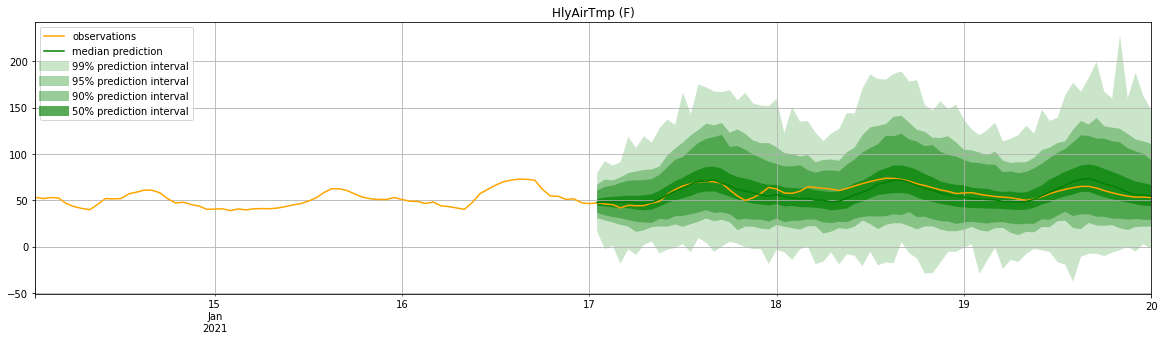

In [168]:
plot_length = 2*3*24
prediction_intervals = [50,90,95,99]
legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

fig, ax = plt.subplots(1, 1, figsize=(20, 5))

for i in [0]:
    tss[i][-plot_length:].plot(ax=ax, color="orange")  # plot the time series
    forecasts[i].plot(prediction_intervals=prediction_intervals, color='g')

#ax.set_xbound("2021-01-17", "2021-01-19")
#ax.set_ybound(0,100)
plt.title(wr_test.columns[i])
plt.grid(which="both")
plt.legend(legend, loc="upper left")
plt.show()

- Inputs
    - PSPS Report Processing, Duration of events
        - 2 months of data
        - 3 events
    - CIMIS Weather Station Data
        - 200 Weather Stations
        - 13 readings from the weather station:  wind, humidity, temp, etc.
        - Total records:  230k, 1 hour each
        * Cross-check events and weather stations
- Outputs
    - Trained model for predicting risk
    * How can it be used?
        - Ex. Next 5 days, low fire risk at weather stations x,y,z with prob %
- Methods
    - Document reading/table extraction for PSPS data
    - Access CIMIS API
    - Join/match data sources based on time
    - During PSPS event, extreme wind/humidity values were observed
        * Pull 2020 and 2019 data for Dec/Jan
        * Were there any high threshold events with no PSPS?  False Negative
        * And False Positives?  A PSPS event with no high values?
    - Built a prediction model to anticipate extreme wind/humidity
        * Produce a statistic:  Prob of high wind in next x days
        * Train model for next 2,3,7 days?
- Challenges/Insights
    - Data feed morning/evening.  How to handle new data?
    - Input from metereology to improve/tune models
    - Relationship between wind/humidity, wind brings humidity down, increasing fire risk
    - GluonTS quantifies risk

In [306]:
from gluonts.evaluation import Evaluator

In [331]:
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9, 0.95, 0.99])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data))

Running evaluation: 100%|██████████| 14/14 [00:00<00:00, 115.51it/s]WARNING:gluonts.time_feature.seasonality:Multiple 60 does not divide base seasonality 1. Falling back to seasonality 1.

/Users/tomityrrell/opt/anaconda3/envs/gluon-ts/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1516: UserWarning: Warning: converting a masked element to nan.
  subarr = np.array(values, dtype=dtype, copy=copy)


In [332]:
import json
print(json.dumps(agg_metrics, indent=4))

{
    "MSE": 4273.5503099257685,
    "abs_error": 72759.64903575182,
    "abs_target_sum": 138090.98112299852,
    "abs_target_mean": 63.228471210164166,
    "seasonal_error": 17.917226598851734,
    "MASE": 2004.456540348366,
    "MAPE": 73.81186080021835,
    "sMAPE": 0.9104988374116221,
    "OWA": NaN,
    "MSIS": 56583.599691533236,
    "QuantileLoss[0.1]": 33560.244213016755,
    "Coverage[0.1]": 0.28479853479853473,
    "QuantileLoss[0.5]": 72759.64931534314,
    "Coverage[0.5]": 0.63003663003663,
    "QuantileLoss[0.9]": 27131.554263551552,
    "Coverage[0.9]": 0.8424908424908424,
    "QuantileLoss[0.95]": 14873.619202116366,
    "Coverage[0.95]": 0.8933150183150182,
    "QuantileLoss[0.99]": 4458.89259215909,
    "Coverage[0.99]": 0.940018315018315,
    "RMSE": 65.37239715603037,
    "NRMSE": 1.0339076037239623,
    "ND": 0.526896459450486,
    "wQuantileLoss[0.1]": 0.24302994982072312,
    "wQuantileLoss[0.5]": 0.5268964614751752,
    "wQuantileLoss[0.9]": 0.19647593233757463,